Model Training

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('/Users/kunj/ML-DL/Cardio_ML_Project/data/cleaned_cardio_data.csv')

In [21]:
df

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_years,BMI,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,0,0,-0.434357,Male,0.452992,-0.847822,-0.994437,-0.141911,0,0,1,0,50,21.967120,False,False,False,False
1,1,1,0.309240,Female,-1.063175,0.760996,0.799656,0.906111,0,0,1,1,55,34.927679,False,True,False,False
2,2,2,-0.246330,Female,0.073950,-0.707925,0.201625,-1.189932,0,0,0,1,51,23.507805,False,True,False,False
3,3,3,-0.746384,Male,0.579339,0.551150,1.397687,1.954132,0,0,1,1,48,28.710479,False,False,False,False
4,4,4,-0.806764,Female,-1.063175,-1.267513,-1.592468,-2.237953,0,0,0,0,47,23.011177,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68677,69995,99993,-0.091127,Male,0.452992,0.131458,-0.396406,-0.141911,1,0,1,0,52,26.927438,False,False,False,False
68678,69996,99995,1.270851,Female,-0.810480,3.628888,0.799656,0.906111,0,0,1,1,61,50.472681,True,False,True,False
68679,69997,99996,-0.161637,Male,2.348200,2.159968,3.191780,0.906111,0,1,0,1,52,31.353579,False,True,False,False
68680,69998,99998,1.201962,Female,-0.178744,-0.148336,0.500640,-0.141911,0,0,0,1,61,27.099251,False,False,True,False


In [22]:
#splitting the data into X and y
X = df.drop(['Unnamed: 0','id','cardio', 'age'],axis=1)
y = df[['cardio']]
X.shape, y.shape

((68682, 14), (68682, 1))

In [23]:
X

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,BMI,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,Male,0.452992,-0.847822,-0.994437,-0.141911,0,0,1,50,21.967120,False,False,False,False
1,Female,-1.063175,0.760996,0.799656,0.906111,0,0,1,55,34.927679,False,True,False,False
2,Female,0.073950,-0.707925,0.201625,-1.189932,0,0,0,51,23.507805,False,True,False,False
3,Male,0.579339,0.551150,1.397687,1.954132,0,0,1,48,28.710479,False,False,False,False
4,Female,-1.063175,-1.267513,-1.592468,-2.237953,0,0,0,47,23.011177,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68677,Male,0.452992,0.131458,-0.396406,-0.141911,1,0,1,52,26.927438,False,False,False,False
68678,Female,-0.810480,3.628888,0.799656,0.906111,0,0,1,61,50.472681,True,False,True,False
68679,Male,2.348200,2.159968,3.191780,0.906111,0,1,0,52,31.353579,False,True,False,False
68680,Female,-0.178744,-0.148336,0.500640,-0.141911,0,0,0,61,27.099251,False,False,True,False


In [24]:
y

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
68677,0
68678,1
68679,1
68680,1


In [25]:
# One-hot encode categorical columns 
# male female to 0 1
X = pd.get_dummies(X)

In [26]:
X

,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,BMI,cholesterol_2,cholesterol_3,gluc_2,gluc_3,gender_Female,gender_Male
0,0.452992,-0.847822,-0.994437,-0.141911,0,0,1,50,21.967120,False,False,False,False,False,True
1,-1.063175,0.760996,0.799656,0.906111,0,0,1,55,34.927679,False,True,False,False,True,False
2,0.073950,-0.707925,0.201625,-1.189932,0,0,0,51,23.507805,False,True,False,False,True,False
3,0.579339,0.551150,1.397687,1.954132,0,0,1,48,28.710479,False,False,False,False,False,True
4,-1.063175,-1.267513,-1.592468,-2.237953,0,0,0,47,23.011177,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68677,0.452992,0.131458,-0.396406,-0.141911,1,0,1,52,26.927438,False,False,False,False,False,True
68678,-0.810480,3.628888,0.799656,0.906111,0,0,1,61,50.472681,True,False,True,False,True,False
68679,2.348200,2.159968,3.191780,0.906111,0,1,0,52,31.353579,False,True,False,False,False,True
68680,-0.178744,-0.148336,0.500640,-0.141911,0,0,0,61,27.099251,False,False,True,False,True,False


In [27]:
from sklearn.model_selection import train_test_split

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, #ketlo traning ma ketlo testing ma
    random_state=42 #random data fix re
)

In [28]:
from sklearn.preprocessing import StandardScaler

# num_cols = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo']

# scaler = StandardScaler()


# # khali training data fit kariyo
# X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# # transform test data
# X_test[num_cols] = scaler.transform(X_test[num_cols])
num_cols=['age_years', 'height', 'weight', 'ap_hi', 'ap_lo']
scalar=StandardScaler()

# aa variables niche use nathi karta
# X_train_scaled=scalar.fit_transform(X_train[num_cols])
# X_test_scaled=scalar.transform(X_test[num_cols])

X_train[num_cols] = scalar.fit_transform(X_train[num_cols])
X_test[num_cols] = scalar.transform(X_test[num_cols])

In [29]:
print("Scaled Data Sample:") 
X_train

Scaled Data Sample:


,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,BMI,cholesterol_2,cholesterol_3,gluc_2,gluc_3,gender_Female,gender_Male
14018,0.448266,-0.286663,-1.589498,-2.231189,0,0,1,-1.896064,24.801587,False,False,False,False,True,False
12535,0.321931,0.975807,-0.396198,-0.140047,0,0,1,-1.748217,31.553659,False,False,False,False,True,False
4233,0.448266,0.134160,0.797101,-0.140047,0,0,1,0.025958,26.927438,False,False,True,False,False,True
385,-2.583766,-1.058173,-0.396198,-0.140047,0,0,1,-0.565433,28.452932,True,False,True,False,True,False
68573,1.079939,0.625121,0.797101,0.905524,0,0,1,0.913046,27.732300,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,-1.573089,0.695258,1.393751,1.951095,0,0,1,0.025958,36.357341,False,True,False,True,True,False
6265,-0.057073,-0.567212,-0.396198,-0.140047,1,1,1,-0.861129,24.538965,False,False,False,False,False,True
54886,0.069262,0.064023,0.498776,0.905524,0,0,1,0.469502,27.548209,False,False,False,False,True,False
860,-1.067750,-0.988036,0.200451,-0.140047,0,0,1,1.060894,24.654832,False,True,False,True,True,False


In [30]:
print("Scaled test Sample:") 
X_test

Scaled test Sample:


,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,BMI,cholesterol_2,cholesterol_3,gluc_2,gluc_3,gender_Female,gender_Male
16886,0.574600,0.064023,-0.396198,-0.140047,0,0,1,1.504438,26.259585,False,False,False,False,True,False
38574,-1.320420,1.186219,0.797101,0.905524,0,0,1,1.504438,38.370720,False,False,False,False,True,False
16107,0.321931,0.554984,1.393751,0.905524,0,0,1,-0.417585,29.402273,False,False,False,False,True,False
19057,-0.941416,-0.356801,-0.396198,-0.140047,0,0,1,-1.156825,27.993022,False,False,False,False,True,False
30247,0.700935,-0.426938,1.990400,0.905524,0,0,0,0.469502,23.529412,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58702,0.321931,-0.637350,-0.396198,-0.140047,0,0,1,0.469502,23.306680,False,False,False,False,True,False
36290,-0.057073,-1.128311,-0.992848,-1.185618,0,0,0,-1.452521,21.564545,False,False,False,False,True,False
53986,0.700935,-0.637350,-0.396198,-0.140047,0,0,0,-0.121889,22.491349,False,False,False,False,True,False
68472,0.195596,-0.426938,-1.589498,-0.140047,0,0,1,1.504438,24.677021,False,False,False,False,True,False


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf_model = RandomForestClassifier(
    n_estimators=100, #number of trees
    max_depth=10, #tree ni depth
    random_state=42
)

In [33]:
#model nu training
rf_model.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
import pickle

In [35]:
with open("/Users/kunj/ML-DL/Cardio_ML_Project/models/rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

In [36]:
with open("/Users/kunj/ML-DL/Cardio_ML_Project/models/scalar.pkl", "wb") as f:
    pickle.dump(scalar, f)

In [37]:
feature_columns = list(X.columns)

with open("/Users/kunj/ML-DL/Cardio_ML_Project/models/feature_columns.pkl", "wb") as f:
    pickle.dump(feature_columns, f)

In [38]:
y_pred = rf_model.predict(X_test)

In [39]:
#accuracy nu calculation
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7342214457305088


[[5475 1415]
 [2236 4611]]


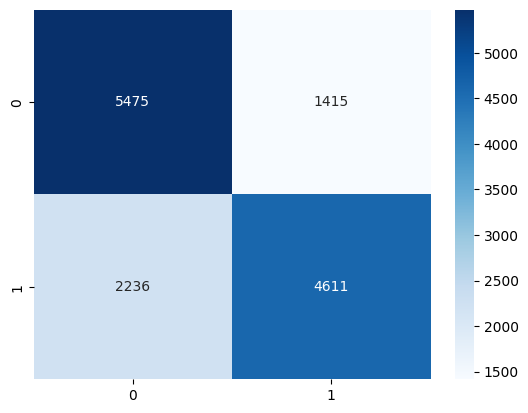

In [40]:
#confusion matrix visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# maru
cm = confusion_matrix(y_test, y_pred)
print(cm)
# AI
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [41]:
#reporting classification metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6890
           1       0.77      0.67      0.72      6847

    accuracy                           0.73     13737
   macro avg       0.74      0.73      0.73     13737
weighted avg       0.74      0.73      0.73     13737



In [42]:
print("Train Accuracy:", rf_model.score(X_train, y_train))
print("Test Accuracy:", rf_model.score(X_test, y_test))

Train Accuracy: 0.7515697515697516
Test Accuracy: 0.7342214457305088


In [43]:
#difference between train and test accuracy
print("Accuracy Difference:", rf_model.score(X_train, y_train) - rf_model.score(X_test, y_test))

Accuracy Difference: 0.01734830583924274


In [44]:
# #for increasing accuracy

# #hyperparameter tuning using GridSearchCV

# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ["sqrt", "log2"]
# }

# grid = GridSearchCV(
#     RandomForestClassifier(random_state=42),
#     param_grid,
#     cv=5, #cross validation
#     scoring='accuracy',
#     n_jobs=-1 #all cores use karva mate
# )

# grid.fit(X_train, y_train)